# ABOUT THE PROJECT

Topic: <b> Examining factors affecting the price of apartments in South Korea using linear regression. </b>
<br> <br>
Data source: www.kaggle.com/datasets/gunhee/koreahousedata
<br> <br>
The purpose of the work is to create the best possible linear regression model that meets all 6 assumptions, making the estimator the best in the class of non-linear and non-biased estimators.
<br> <br>
In order to form the model, 31 models were created and their effectiveness was checked with the RESET test, which states about the linear relationship. Unfortunately, none of the models passed RESET test, so the last created model (named "f2") was used to test the remaining assumptions of the classical linear regression model.
<br> <br>
The remaining 30 models were removed from the notebook because they cluttered it a lot.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import math
from pylab import *

In [2]:
df0 = pd.read_csv("Daegu_Real_Estate_data.csv")

# Cleaning and organizing the input data

In [3]:
#At first, I tidy up the data: limit the year of observation, remove unnecessary columns, 
#sum up those columns that can be summed, rename columns, reset row indexes.

df = df0[df0['YrSold']==2016]

df = df.drop(['YrSold','HallwayType','HeatingType','AptManageType', 
         'SubwayStation','N_FacilitiesNearBy(PublicOffice)',
         'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(ETC)',
         'N_SchoolNearBy(Elementary)','N_SchoolNearBy(Middle)','N_SchoolNearBy(High)',
         'N_SchoolNearBy(University)','N_FacilitiesNearBy(Total)'], axis=1)

df['N_ParkingLot'] = df['N_Parkinglot(Ground)'] + df['N_Parkinglot(Basement)']

df = df.drop(['N_Parkinglot(Ground)','N_Parkinglot(Basement)'], axis=1)

df.rename(columns = {'SalePrice':'SalePrice_USD',
                    'Size(sqf)':'Size_sqf',
                    'N_APT':'N_Apt',
                    'N_manager':'N_Manager',
                    'N_elevators':'N_Elevators',
                    'N_FacilitiesNearBy(Hospital)':'N_Hospitals_Nearby',
                    'N_FacilitiesNearBy(Mall)':'N_Malls_Nearby',
                    'N_FacilitiesNearBy(Park)':'N_Parks_Nearby',
                    'N_SchoolNearBy(Total)':'N_Schools_Nearby'}, inplace = True)

df = df.reset_index()

df = df.drop(['index'], axis=1)

In [4]:
print(df.TimeToBusStop.unique())
print(df.TimeToSubway.unique())

['0~5min' '5min~10min' '10min~15min']
['0-5min' '10min~15min' '5min~10min' '15min~20min' 'no_bus_stop_nearby']


In [5]:
#The 'TimeToBusStop'/'TimeToSubway' is given in ranges. I convert both variables into binary variables.

for row,item in enumerate(df['TimeToBusStop']):
    if item == '5min~10min':
        df.loc[row,'TimeToBusStop_5_10'] = 1
    else:
        df.loc[row,'TimeToBusStop_5_10'] = 0

           
for row,item in enumerate(df['TimeToBusStop']):
    if item == '10min~15min':
        df.loc[row,'TimeToBusStop_10_15'] = 1
    else:
        df.loc[row,'TimeToBusStop_10_15'] = 0
        
        
for row,item in enumerate(df['TimeToSubway']):
    if item == '5min~10min':
        df.loc[row,'TimeToSubway_5_10'] = 1
    else:
        df.loc[row,'TimeToSubway_5_10'] = 0

for row,item in enumerate(df['TimeToSubway']):
    if item == '10min~15min':
        df.loc[row,'TimeToSubway_10_15'] = 1
    else:
        df.loc[row,'TimeToSubway_10_15'] = 0

for row,item in enumerate(df['TimeToSubway']):
    if item == '15min~20min':
        df.loc[row,'TimeToSubway_15_20'] = 1
    else:
        df.loc[row,'TimeToSubway_15_20'] = 0

        
for row,item in enumerate(df['TimeToSubway']):
    if item == 'no_bus_stop_nearby':
        df.loc[row,'TimeToSubway_no_nearby'] = 1
    else:
        df.loc[row,'TimeToSubway_no_nearby'] = 0

In [6]:
df = df.drop(['TimeToBusStop', 'TimeToSubway'], axis=1)

In [7]:
df.dtypes

SalePrice_USD               int64
YearBuilt                   int64
MonthSold                   int64
Size_sqf                    int64
Floor                       int64
N_Apt                     float64
N_Manager                 float64
N_Elevators               float64
N_Hospitals_Nearby          int64
N_Malls_Nearby            float64
N_Parks_Nearby            float64
N_FacilitiesInApt           int64
N_Schools_Nearby          float64
N_ParkingLot              float64
TimeToBusStop_5_10        float64
TimeToBusStop_10_15       float64
TimeToSubway_5_10         float64
TimeToSubway_10_15        float64
TimeToSubway_15_20        float64
TimeToSubway_no_nearby    float64
dtype: object

In [8]:
#In the commented-out portion of the code below you can see that variables that are floats are them unnecessarily, so I change them to integers.

#print(df['N_Apt'].unique())
#print(df['N_Manager'].unique())
#print(df['N_Elevators'].unique())
#print(df['N_Malls_Nearby'].unique())
#print(df['N_Parks_Nearby'].unique())
#print(df['N_Schools_Nearby'].unique())
#print(df['N_ParkingLot'].unique())

df['N_Apt'] = df['N_Apt'].astype(int)
df['N_Manager'] = df['N_Manager'].astype(int)
df['N_Elevators'] = df['N_Elevators'].astype(int)
df['N_Malls_Nearby'] = df['N_Malls_Nearby'].astype(int)
df['N_Parks_Nearby'] = df['N_Parks_Nearby'].astype(int)
df['N_Schools_Nearby'] = df['N_Schools_Nearby'].astype(int)
df['N_ParkingLot'] = df['N_ParkingLot'].astype(int)

df['TimeToBusStop_5_10'] = df['TimeToBusStop_5_10'].astype(int)
df['TimeToBusStop_10_15'] = df['TimeToBusStop_10_15'].astype(int)
df['TimeToSubway_5_10'] = df['TimeToSubway_5_10'].astype(int)
df['TimeToSubway_10_15'] = df['TimeToSubway_10_15'].astype(int)
df['TimeToSubway_15_20'] = df['TimeToSubway_15_20'].astype(int)
df['TimeToSubway_no_nearby'] = df['TimeToSubway_no_nearby'].astype(int)

# Basic statistics and histogram of the dependent variable

In [9]:
#basic information about the dependent variable
print(df['SalePrice_USD'].describe())

count       751.000000
mean     234509.402130
std      108659.567846
min       53274.000000
25%      147761.000000
50%      224336.000000
75%      327433.000000
max      530973.000000
Name: SalePrice_USD, dtype: float64


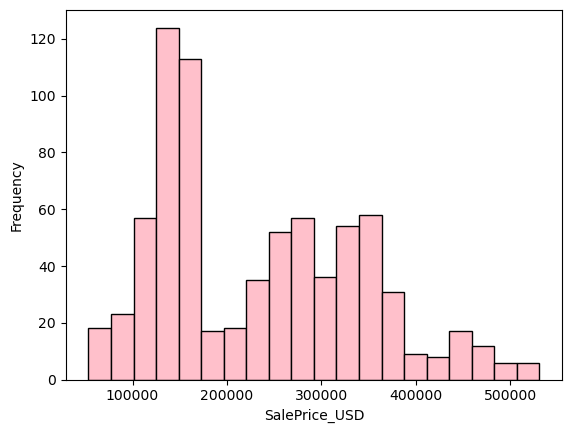

In [10]:
plt.hist(df['SalePrice_USD'], bins=20, edgecolor='black', color='pink') 
xlabel('SalePrice_USD')
ylabel('Frequency') #distribution is asymmetric - right-sided asymmetry
plt.show()

# Correlation analysis of variables

In [11]:
list(df.columns)

['SalePrice_USD',
 'YearBuilt',
 'MonthSold',
 'Size_sqf',
 'Floor',
 'N_Apt',
 'N_Manager',
 'N_Elevators',
 'N_Hospitals_Nearby',
 'N_Malls_Nearby',
 'N_Parks_Nearby',
 'N_FacilitiesInApt',
 'N_Schools_Nearby',
 'N_ParkingLot',
 'TimeToBusStop_5_10',
 'TimeToBusStop_10_15',
 'TimeToSubway_5_10',
 'TimeToSubway_10_15',
 'TimeToSubway_15_20',
 'TimeToSubway_no_nearby']

In [12]:
df_allvariables = df[['SalePrice_USD',
 'YearBuilt',
 'MonthSold',
 'Size_sqf',
 'Floor',
 'N_Apt',
 'N_Manager',
 'N_Elevators',
 'N_Hospitals_Nearby',
 'N_Malls_Nearby',
 'N_Parks_Nearby',
 'N_FacilitiesInApt',
 'N_Schools_Nearby',
 'N_ParkingLot',
 'TimeToBusStop_5_10',
 'TimeToBusStop_10_15',
 'TimeToSubway_5_10',
 'TimeToSubway_10_15',
 'TimeToSubway_15_20',
'TimeToSubway_no_nearby']]

<AxesSubplot:>

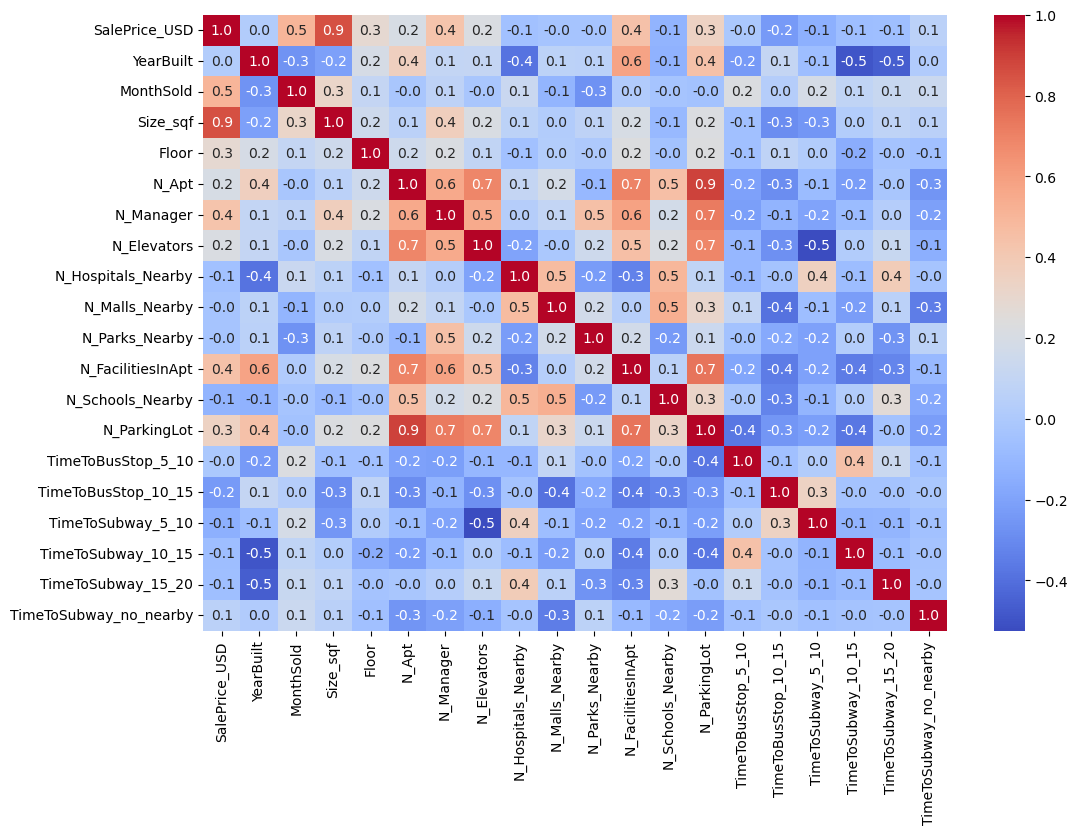

In [13]:
plt.rc('figure', figsize = (12,8))
sns.heatmap(df_allvariables.corr(method='pearson'),annot=True,cmap='coolwarm', fmt=".1f")

#Conclusions: the strongest correlation of x with y is with the variable 'size' (0.9). Then the closest strongest correlation = 0.5. Strong correlation 'nparkinglot' with 'napt' -> I get rid of the 'napt' variable from dataframe. Other variables don't have a strong correlation.
#If there are two highly correlated variables then we should take just one of them into the model, because they carry the same information load (The one that has a higher correlation with y).

In [14]:
df = df.drop(['N_Apt'], axis=1)
df_allvariables = df_allvariables.drop(['N_Apt'], axis=1)

# Variable transformations

At first I created models with all the variables, but RESET tests failed. I tried different combinations, removal of variables, interactions, but still nothing came out well. I decided to add transformed variables, because sometimes adding them can improve the model.

In [15]:
df_allvariables

,SalePrice_USD,YearBuilt,MonthSold,Size_sqf,Floor,N_Manager,N_Elevators,N_Hospitals_Nearby,N_Malls_Nearby,N_Parks_Nearby,N_FacilitiesInApt,N_Schools_Nearby,N_ParkingLot,TimeToBusStop_5_10,TimeToBusStop_10_15,TimeToSubway_5_10,TimeToSubway_10_15,TimeToSubway_15_20,TimeToSubway_no_nearby
0,149274,2013,1,644,18,6,14,1,1,1,7,11,938,0,0,0,0,0,0
1,102601,2013,1,426,7,6,14,1,1,1,7,11,938,0,0,0,0,0,0
2,101548,2013,1,426,5,6,14,1,1,1,7,11,938,0,0,0,0,0,0
3,146256,2013,1,644,15,6,14,1,1,1,7,11,938,0,0,0,0,0,0
4,140380,2013,1,644,1,6,14,1,1,1,7,11,938,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,283185,2006,12,903,8,3,11,1,1,0,4,11,304,1,0,0,0,0,0
747,336283,2007,12,868,10,14,16,1,1,2,10,10,1270,0,0,0,0,0,0
748,212389,1978,12,903,2,1,4,2,1,0,3,11,87,0,0,0,0,0,0
749,196460,1978,12,779,1,1,4,2,1,0,3,11,87,0,0,0,0,0,0


In [16]:
#I add columns of all possible variables as logarithm, root, second and third powers.

for row,item in enumerate(df['SalePrice_USD']):
    if (item == 0 or item == 0.0):
        df.loc[row,'SalePrice_USD'] = 0.01

for row,item in enumerate(df['YearBuilt']):
    if (item == 0 or item == 0.0):
        df.loc[row,'YearBuilt'] = 0.01
        
for row,item in enumerate(df['MonthSold']):
    if (item == 0 or item == 0.0):
        df.loc[row,'MonthSold'] = 0.01
        
for row,item in enumerate(df['Size_sqf']):
    if (item == 0 or item == 0.0):
        df.loc[row,'Size_sqf'] = 0.01
        
for row,item in enumerate(df['Floor']):
    if (item == 0 or item == 0.0):
        df.loc[row,'Floor'] = 0.01
        
for row,item in enumerate(df['N_Manager']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_Manager'] = 0.01
        
for row,item in enumerate(df['N_Elevators']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_Elevators'] = 0.01
        
for row,item in enumerate(df['N_Hospitals_Nearby']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_Hospitals_Nearby'] = 0.01
        
for row,item in enumerate(df['N_Malls_Nearby']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_Malls_Nearby'] = 0.01
        
for row,item in enumerate(df['N_Parks_Nearby']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_Parks_Nearby'] = 0.01
        
for row,item in enumerate(df['N_FacilitiesInApt']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_FacilitiesInApt'] = 0.01
        
for row,item in enumerate(df['N_Schools_Nearby']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_Schools_Nearby'] = 0.01
        
for row,item in enumerate(df['N_ParkingLot']):
    if (item == 0 or item == 0.0):
        df.loc[row,'N_ParkingLot'] = 0.01


df['lnSalePrice_USD']=np.log(df['SalePrice_USD'])
df['lnYearBuilt']=np.log(df['YearBuilt'])
df['lnMonthSold']=np.log(df['MonthSold'])
df['lnSize_sqf']=np.log(df['Size_sqf'])
df['lnFloor']=np.log(df['Floor'])
df['lnN_Manager']=np.log(df['N_Manager'])
df['lnN_Elevators']=np.log(df['N_Elevators'])
df['lnN_Hospitals_Nearby']=np.log(df['N_Hospitals_Nearby'])
df['lnN_Malls_Nearby']=np.log(df['N_Malls_Nearby'])
df['lnN_Parks_Nearby']=np.log(df['N_Parks_Nearby'])
df['lnN_FacilitiesInApt']=np.log(df['N_FacilitiesInApt'])
df['lnN_Schools_Nearby']=np.log(df['N_Schools_Nearby'])
df['lnN_ParkingLot']=np.log(df['N_ParkingLot'])

df['SalePrice_USD2'] = df['SalePrice_USD'] * df['SalePrice_USD']
df['YearBuilt2']= df['YearBuilt'] * df['YearBuilt']
df['MonthSold2']= df['MonthSold'] * df['MonthSold']
df['Size_sqf2']= df['Size_sqf'] * df['Size_sqf']
df['Floor2']= df['Floor'] * df['Floor']
df['N_Manager2']= df['N_Manager'] * df['N_Manager']
df['N_Elevators2']= df['N_Elevators'] * df['N_Elevators']
df['N_Hospitals_Nearby2']= df['N_Hospitals_Nearby'] * df['N_Hospitals_Nearby']
df['N_Malls_Nearby2']= df['N_Malls_Nearby'] * df['N_Malls_Nearby']
df['N_Parks_Nearby2']= df['N_Parks_Nearby'] * df['N_Parks_Nearby']
df['N_FacilitiesInApt2']= df['N_FacilitiesInApt'] * df['N_FacilitiesInApt']
df['N_Schools_Nearby2']= df['N_Schools_Nearby'] * df['N_Schools_Nearby']
df['N_ParkingLot2']= df['N_ParkingLot'] * df['N_ParkingLot']

df['SalePrice_USD3']= df['SalePrice_USD'] * df['SalePrice_USD'] * df['SalePrice_USD']
df['YearBuilt3']= df['YearBuilt'] * df['YearBuilt'] * df['YearBuilt']
df['MonthSold3']= df['MonthSold'] * df['MonthSold'] * df['MonthSold']
df['Size_sqf3']=df['Size_sqf'] *df['Size_sqf'] *df['Size_sqf']
df['Floor3']=df['Floor'] *df['Floor'] *df['Floor']
df['N_Manager3']=df['N_Manager'] * df['N_Manager'] * df['N_Manager']
df['N_Elevators3']=df['N_Elevators'] *df['N_Elevators'] *df['N_Elevators']
df['N_Hospitals_Nearby3']=df['N_Hospitals_Nearby'] *df['N_Hospitals_Nearby'] *df['N_Hospitals_Nearby']
df['N_Malls_Nearby3']=df['N_Malls_Nearby'] * df['N_Malls_Nearby'] * df['N_Malls_Nearby'] 
df['N_Parks_Nearby3']=df['N_Parks_Nearby'] *df['N_Parks_Nearby'] *df['N_Parks_Nearby']
df['N_FacilitiesInApt3']=df['N_FacilitiesInApt'] * df['N_FacilitiesInApt'] * df['N_FacilitiesInApt'] 
df['N_Schools_Nearby3']=df['N_Schools_Nearby'] *df['N_Schools_Nearby'] *df['N_Schools_Nearby'] 
df['N_ParkingLot3']=df['N_ParkingLot'] * df['N_ParkingLot'] * df['N_ParkingLot'] 

df['SalePrice_USD_sqrt']= df['SalePrice_USD']**(1/2)
df['YearBuilt_sqrt']= df['YearBuilt']**(1/2)
df['MonthSold_sqrt']= df['MonthSold']**(1/2)
df['Size_sqf_sqrt']= df['Size_sqf']**(1/2)
df['Floor_sqrt']= df['Floor']**(1/2)
df['N_Manager_sqrt']= df['N_Manager']**(1/2)
df['N_Elevators_sqrt']= df['N_Elevators']**(1/2)
df['N_Hospitals_Nearby_sqrt']= df['N_Hospitals_Nearby']**(1/2)
df['N_Malls_Nearby_sqrt']= df['N_Malls_Nearby']**(1/2)
df['N_Parks_Nearby_sqrt']= df['N_Parks_Nearby']**(1/2)
df['N_FacilitiesInApt_sqrt']= df['N_FacilitiesInApt']**(1/2)
df['N_Schools_Nearby_sqrt']=df['N_Schools_Nearby']**(1/2)
df['N_ParkingLot_sqrt']=df['N_ParkingLot']**(1/2)

In [17]:
#df.columns

# Scatter plots - searching for linear dependencies

With the help of scatter plots, I tried to find linear relationships by substituting different transformations of the variables one by one. Except for a few variables that improved the linear relationship in a small way, no major improvement was gained.
<br> <br>
I removed the charts because they littered the notebook a lot

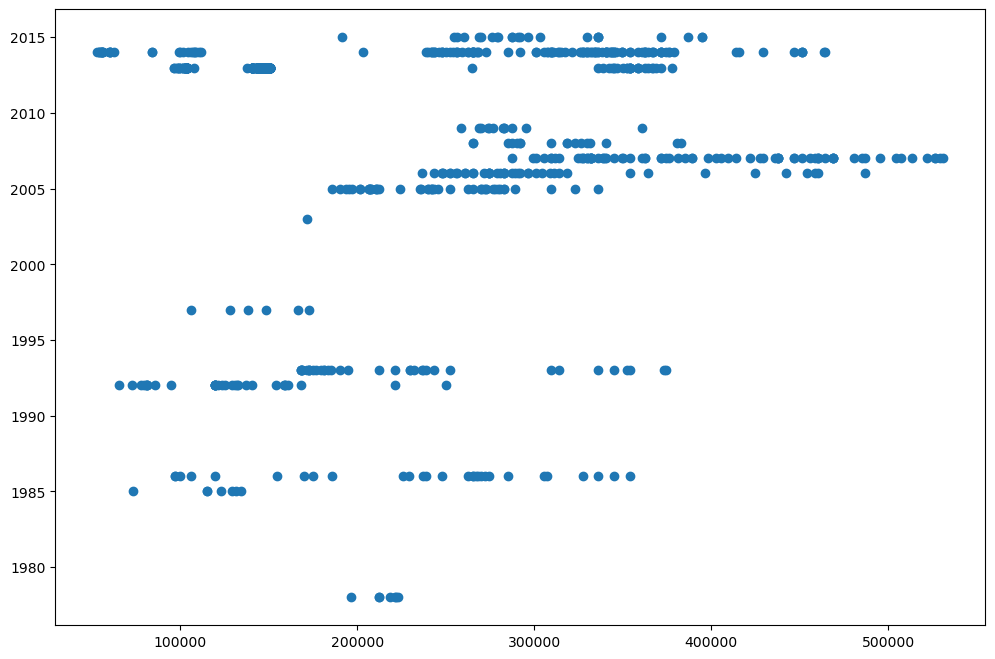

In [18]:
plot(df['SalePrice_USD'], df['YearBuilt'],'o')
show()

# LINEAR MODEL

In [19]:
f2 = smf.ols(formula = 'SalePrice_USD ~ MonthSold+Size_sqf+Size_sqf2+Floor+N_Manager+N_Elevators+N_Hospitals_Nearby+N_Malls_Nearby+N_Parks_Nearby+N_FacilitiesInApt+N_Schools_Nearby+N_ParkingLot+C(TimeToBusStop_5_10)+C(TimeToBusStop_10_15)+C(TimeToSubway_5_10)+C(TimeToSubway_10_15)+C(TimeToSubway_15_20)+C(TimeToSubway_no_nearby)', data = df).fit()
f2.summary() #this is the model on which I will test the assumptions of the classical linear regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_USD   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     581.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:10:57   Log-Likelihood:                -8749.1
No. Observations:                 751   AIC:                         1.754e+04
Df Residuals:                     732   BIC:                         1.762e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.611e+05   1.47e+04    -10.942      0.000    -1.9e+05   -1.32e+05
C(TimeToBusStop_5_10)[T.1]      -1.47e+04   5980.512     -2.458      0.014   -2.64e+04   -2962.026
C(TimeToBusStop_10_15)[T.1]     7.664e+04    1.5e+04      5.099      0.000    4.71e+04    1.06e+05
C(TimeToSubway_5_10)[T.1]       3.656e+04   5285.463      6.916      0.000    2.62e+04    4.69e+04
C(TimeToSubway_10_15)[T.1]      1.421e+04   7754.745      1.832      0.067   -1016.639    2.94e+04
C(TimeToSubway_15_20)[T.1]         -2e+04   7321.519     -2.732      0.006   -3.44e+04   -5628.061
C(TimeToSubway_no_nearby)[T.1]  1.274e+05   1.32e+04      9.676      0.000    1.02e+05    1.53e+05
MonthSold                       4059.8187    345.974     11.734      0.000    3380.598    4739.039
Size_sqf                         445.0813     17.509     25.421      0.000     410.708     479.454
Size_sqf2                         -0.0996      0.008    -12.667      0.000      -0.115      -0.084
Floor                            967.4769    154.453      6.264      0.000     664.253    1270.701
N_Manager                       1.568e+04   1251.978     12.523      0.000    1.32e+04    1.81e+04
N_Elevators                     1070.4722    448.941      2.384      0.017     189.106    1951.838
N_Hospitals_Nearby             -4.954e+04   5756.246     -8.607      0.000   -6.08e+04   -3.82e+04
N_Malls_Nearby                  1.091e+05   1.07e+04     10.147      0.000     8.8e+04     1.3e+05
N_Parks_Nearby                 -6.201e+04   4250.009    -14.590      0.000   -7.04e+04   -5.37e+04
N_FacilitiesInApt               1.126e+04   1805.590      6.234      0.000    7710.796    1.48e+04
N_Schools_Nearby               -3987.9195    461.678     -8.638      0.000   -4894.290   -3081.549
N_ParkingLot                     -80.8988     14.526     -5.569      0.000    -109.417     -52.381
==============================================================================
Omnibus:                      126.609   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.995
Skew:                           0.899   Prob(JB):                     2.65e-66
Kurtosis:                       5.533   Cond. No.                     2.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 # ASSUMPTIONS OF THE LINEAR REGRESSION MODEL

# Homoscedasticity (not met)

In [21]:
from pylab import *

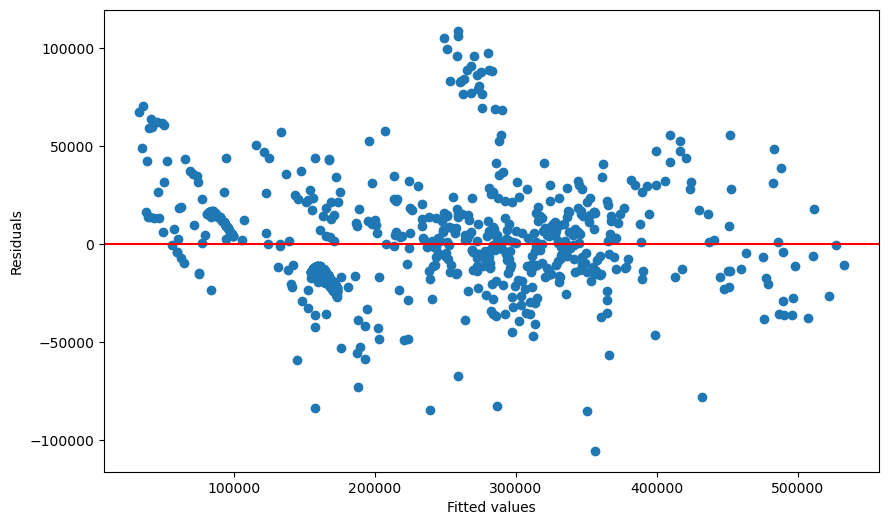

In [22]:
plt.rc('figure', figsize = (10,6))
scatter(f2.fittedvalues, f2.resid)
axhline(y = 0, color = 'red')
xlabel('Fitted values')
ylabel('Residuals')
show() #Points around zero are not evenly distributed; points should be equally spaced above and below zero

In [23]:
df['residuals'] = f2.resid
df['predictions'] = f2.predict()

<AxesSubplot:xlabel='predictions', ylabel='residuals'>

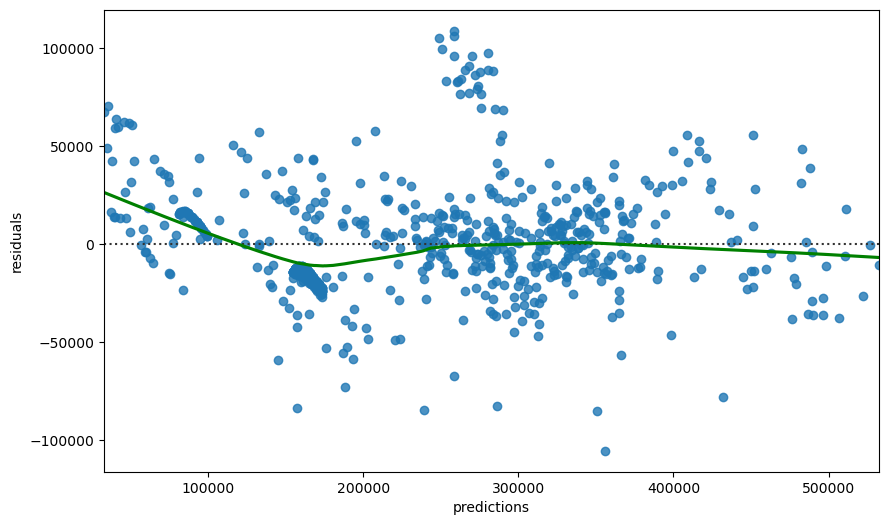

In [24]:
sns.residplot(data = df, x = 'predictions' , y = 'residuals', lowess = True, line_kws = dict(color = 'g')) #This plot suggests that the assumption of linearity is unlikely to be met

In [25]:
test1 = sms.het_breuschpagan(f2.resid, f2.model.exog)
test1

(130.6176978442581,
 4.043116446430099e-19,
 8.562117843371922,
 3.495352699693536e-21)

In [26]:
from statsmodels.compat import lzip

In [27]:
nam1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

In [28]:
lzip(nam1, test1) #problem of heteroscedasticity

[('lagrange multiplier statistic', 130.6176978442581),
 ('p-value', 4.043116446430099e-19),
 ('f-value', 8.562117843371922),
 ('f p-value', 3.495352699693536e-21)]

In [29]:
df['residuals2'] = f2.resid*f2.resid

In [30]:
f4 = smf.ols(formula = 'residuals2 ~ MonthSold+Size_sqf+Size_sqf2+Floor+N_Manager+N_Elevators+N_Hospitals_Nearby+N_Malls_Nearby+N_Parks_Nearby+N_FacilitiesInApt+N_Schools_Nearby+N_ParkingLot+C(TimeToBusStop_5_10)+C(TimeToBusStop_10_15)+C(TimeToSubway_5_10)+C(TimeToSubway_10_15)+C(TimeToSubway_15_20)+C(TimeToSubway_no_nearby)', data = df).fit()
f4.summary() #statistically significant variables can be resposible for heteroskedasticity

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             residuals2   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     8.562
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.50e-21
Time:                        11:10:58   Log-Likelihood:                -16928.
No. Observations:                 751   AIC:                         3.389e+04
Df Residuals:                     732   BIC:                         3.398e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2.834e+08   7.91e+08     -0.358      0.720   -1.84e+09    1.27e+09
C(TimeToBusStop_5_10)[T.1]     -6.658e+08   3.21e+08     -2.073      0.039    -1.3e+09   -3.52e+07
C(TimeToBusStop_10_15)[T.1]     4.691e+08   8.07e+08      0.581      0.561   -1.12e+09    2.05e+09
C(TimeToSubway_5_10)[T.1]       1.157e+09   2.84e+08      4.077      0.000       6e+08    1.71e+09
C(TimeToSubway_10_15)[T.1]      -3.26e+08   4.16e+08     -0.783      0.434   -1.14e+09    4.92e+08
C(TimeToSubway_15_20)[T.1]      1.442e+09   3.93e+08      3.666      0.000     6.7e+08    2.21e+09
C(TimeToSubway_no_nearby)[T.1] -2.668e+09   7.07e+08     -3.775      0.000   -4.06e+09   -1.28e+09
MonthSold                       5.929e+07   1.86e+07      3.191      0.001    2.28e+07    9.58e+07
Size_sqf                        4.644e+06    9.4e+05      4.939      0.000     2.8e+06    6.49e+06
Size_sqf2                      -1493.8355    422.361     -3.537      0.000   -2323.018    -664.653
Floor                           2.161e+07   8.29e+06      2.606      0.009    5.33e+06    3.79e+07
N_Manager                      -3.281e+08   6.72e+07     -4.880      0.000    -4.6e+08   -1.96e+08
N_Elevators                     -2.98e+07   2.41e+07     -1.236      0.217   -7.71e+07    1.75e+07
N_Hospitals_Nearby             -1.433e+09   3.09e+08     -4.635      0.000   -2.04e+09   -8.26e+08
N_Malls_Nearby                 -5.732e+08   5.77e+08     -0.993      0.321   -1.71e+09     5.6e+08
N_Parks_Nearby                  1.387e+09   2.28e+08      6.077      0.000    9.39e+08    1.84e+09
N_FacilitiesInApt              -1.552e+08    9.7e+07     -1.601      0.110   -3.46e+08    3.51e+07
N_Schools_Nearby                1.348e+08   2.48e+07      5.438      0.000    8.62e+07    1.84e+08
N_ParkingLot                     1.04e+06    7.8e+05      1.333      0.183   -4.92e+05    2.57e+06
==============================================================================
Omnibus:                      562.380   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8463.957
Skew:                           3.325   Prob(JB):                         0.00
Kurtosis:                      18.042   Cond. No.                     2.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#variables in f2 model that can be responsible for heteroskedasticity:
#TimeToBusStop_5_10,TimeToSubway_5_10,TimeToSubway_15_20,TimeToSubway_no_nearby,MonthSold,Size_sqf,Size_sqf2,N_Manager,N_Hospitals_Nearby,N_Parks_Nearby,N_Schools_Nearby

#all of these variables in the f2 model are statistically significant, and as can be seen from the scatter plot - there is no simple transformation that would yield a linear function

In [32]:
#heteroskedasticity-> standard error column cannot be trusted

In [33]:
f5 = smf.ols(formula = 'SalePrice_USD ~ MonthSold+Size_sqf+Size_sqf2+Floor+N_Manager+N_Elevators+N_Hospitals_Nearby+N_Malls_Nearby+N_Parks_Nearby+N_FacilitiesInApt+N_Schools_Nearby+N_ParkingLot+C(TimeToBusStop_5_10)+C(TimeToBusStop_10_15)+C(TimeToSubway_5_10)+C(TimeToSubway_10_15)+C(TimeToSubway_15_20)+C(TimeToSubway_no_nearby)', data = df).fit(cov_type = 'HC0')
f5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_USD   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     974.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:10:58   Log-Likelihood:                -8749.1
No. Observations:                 751   AIC:                         1.754e+04
Df Residuals:                     732   BIC:                         1.762e+04
Df Model:                          18                                         
Covariance Type:                  HC0                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.611e+05   1.67e+04     -9.633      0.000   -1.94e+05   -1.28e+05
C(TimeToBusStop_5_10)[T.1]      -1.47e+04   6340.529     -2.319      0.020   -2.71e+04   -2275.821
C(TimeToBusStop_10_15)[T.1]     7.664e+04   1.57e+04      4.870      0.000    4.58e+04    1.07e+05
C(TimeToSubway_5_10)[T.1]       3.656e+04   6652.233      5.495      0.000    2.35e+04    4.96e+04
C(TimeToSubway_10_15)[T.1]      1.421e+04   6817.968      2.084      0.037     844.582    2.76e+04
C(TimeToSubway_15_20)[T.1]         -2e+04   8126.597     -2.461      0.014   -3.59e+04   -4073.903
C(TimeToSubway_no_nearby)[T.1]  1.274e+05   1.31e+04      9.704      0.000    1.02e+05    1.53e+05
MonthSold                       4059.8187    447.358      9.075      0.000    3183.014    4936.623
Size_sqf                         445.0813     26.072     17.071      0.000     393.981     496.181
Size_sqf2                         -0.0996      0.012     -8.272      0.000      -0.123      -0.076
Floor                            967.4769    166.406      5.814      0.000     641.326    1293.627
N_Manager                       1.568e+04   1742.796      8.996      0.000    1.23e+04    1.91e+04
N_Elevators                     1070.4722    494.636      2.164      0.030     101.003    2039.942
N_Hospitals_Nearby             -4.954e+04   6553.937     -7.560      0.000   -6.24e+04   -3.67e+04
N_Malls_Nearby                  1.091e+05   1.22e+04      8.968      0.000    8.52e+04    1.33e+05
N_Parks_Nearby                 -6.201e+04   6137.231    -10.104      0.000    -7.4e+04      -5e+04
N_FacilitiesInApt               1.126e+04   2002.764      5.620      0.000    7330.203    1.52e+04
N_Schools_Nearby               -3987.9195    572.854     -6.961      0.000   -5110.693   -2865.146
N_ParkingLot                     -80.8988     16.842     -4.803      0.000    -113.909     -47.889
==============================================================================
Omnibus:                      126.609   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.995
Skew:                           0.899   Prob(JB):                     2.65e-66
Kurtosis:                       5.533   Cond. No.                     2.26e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
from stargazer.stargazer import Stargazer

In [35]:
Stargazer([f2, f5]) 

# NO AUTO-CORRELATION (not met)

In [36]:
test3 = sms.acorr_breusch_godfrey(f2)
test3

(166.65415502998675,
 1.3662782308833363e-30,
 20.591281854433838,
 8.420313831205766e-34)

In [37]:
lzip(nam1, test3) #there is correlation (p-value ~ 0)

[('lagrange multiplier statistic', 166.65415502998675),
 ('p-value', 1.3662782308833363e-30),
 ('f-value', 20.591281854433838),
 ('f p-value', 8.420313831205766e-34)]

# LINEAR RELATIONSHIP - RESET TEST (not met)

In [38]:
sms.linear_reset(f2, power = 3, test_type = 'fitted') #the estimator is biased

C:\Users\magda\anaconda3\envs\myPython\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=2402.6792261868804, p-value=0.0, df_denom=2>

In [39]:
sms.linear_reset(f2, power = 3, test_type = 'exog')

C:\Users\magda\anaconda3\envs\myPython\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 5
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=23352.012636929554, p-value=0.0, df_denom=5>

# CHOW TEST

In [40]:
#No need for a test because there is no variable that could be responsible for the division.

# RANDOM COMPONENT HAS NORMAL DISTRIBUTION (met)

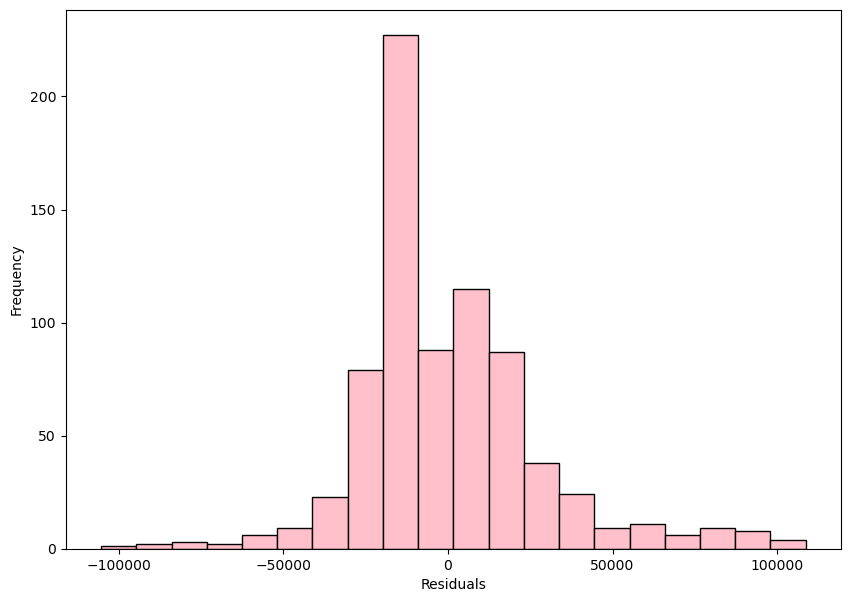

In [41]:
plt.rc('figure', figsize = (10,7))
hist(f2.resid, bins = 20, color = 'pink', edgecolor = 'black')
xlabel('Residuals')
ylabel('Frequency')
show()

In [42]:
import statsmodels.api as sm

In [43]:
test5 = sms.jarque_bera(f2.resid)
test5
#JB test not met but the sample is larger than 100 so not meeting the assumption of normal distribution doesn't bother me.

(301.99540395379114,
 2.645643065496069e-66,
 0.8990350670829953,
 5.533363128178197)

In [44]:
nam2 = ['The Jarque-Bera test statistic', 'p-value', 'skewness', 'kurtosis']

In [45]:
lzip(nam2, test5)

[('The Jarque-Bera test statistic', 301.99540395379114),
 ('p-value', 2.645643065496069e-66),
 ('skewness', 0.8990350670829953),
 ('kurtosis', 5.533363128178197)]

# ATYPICAL AND ERRONEOUS OBSERVATIONS

In [46]:
h_lev = (2*len(f2.params))/f2.nobs
round(h_lev, 2)

0.05

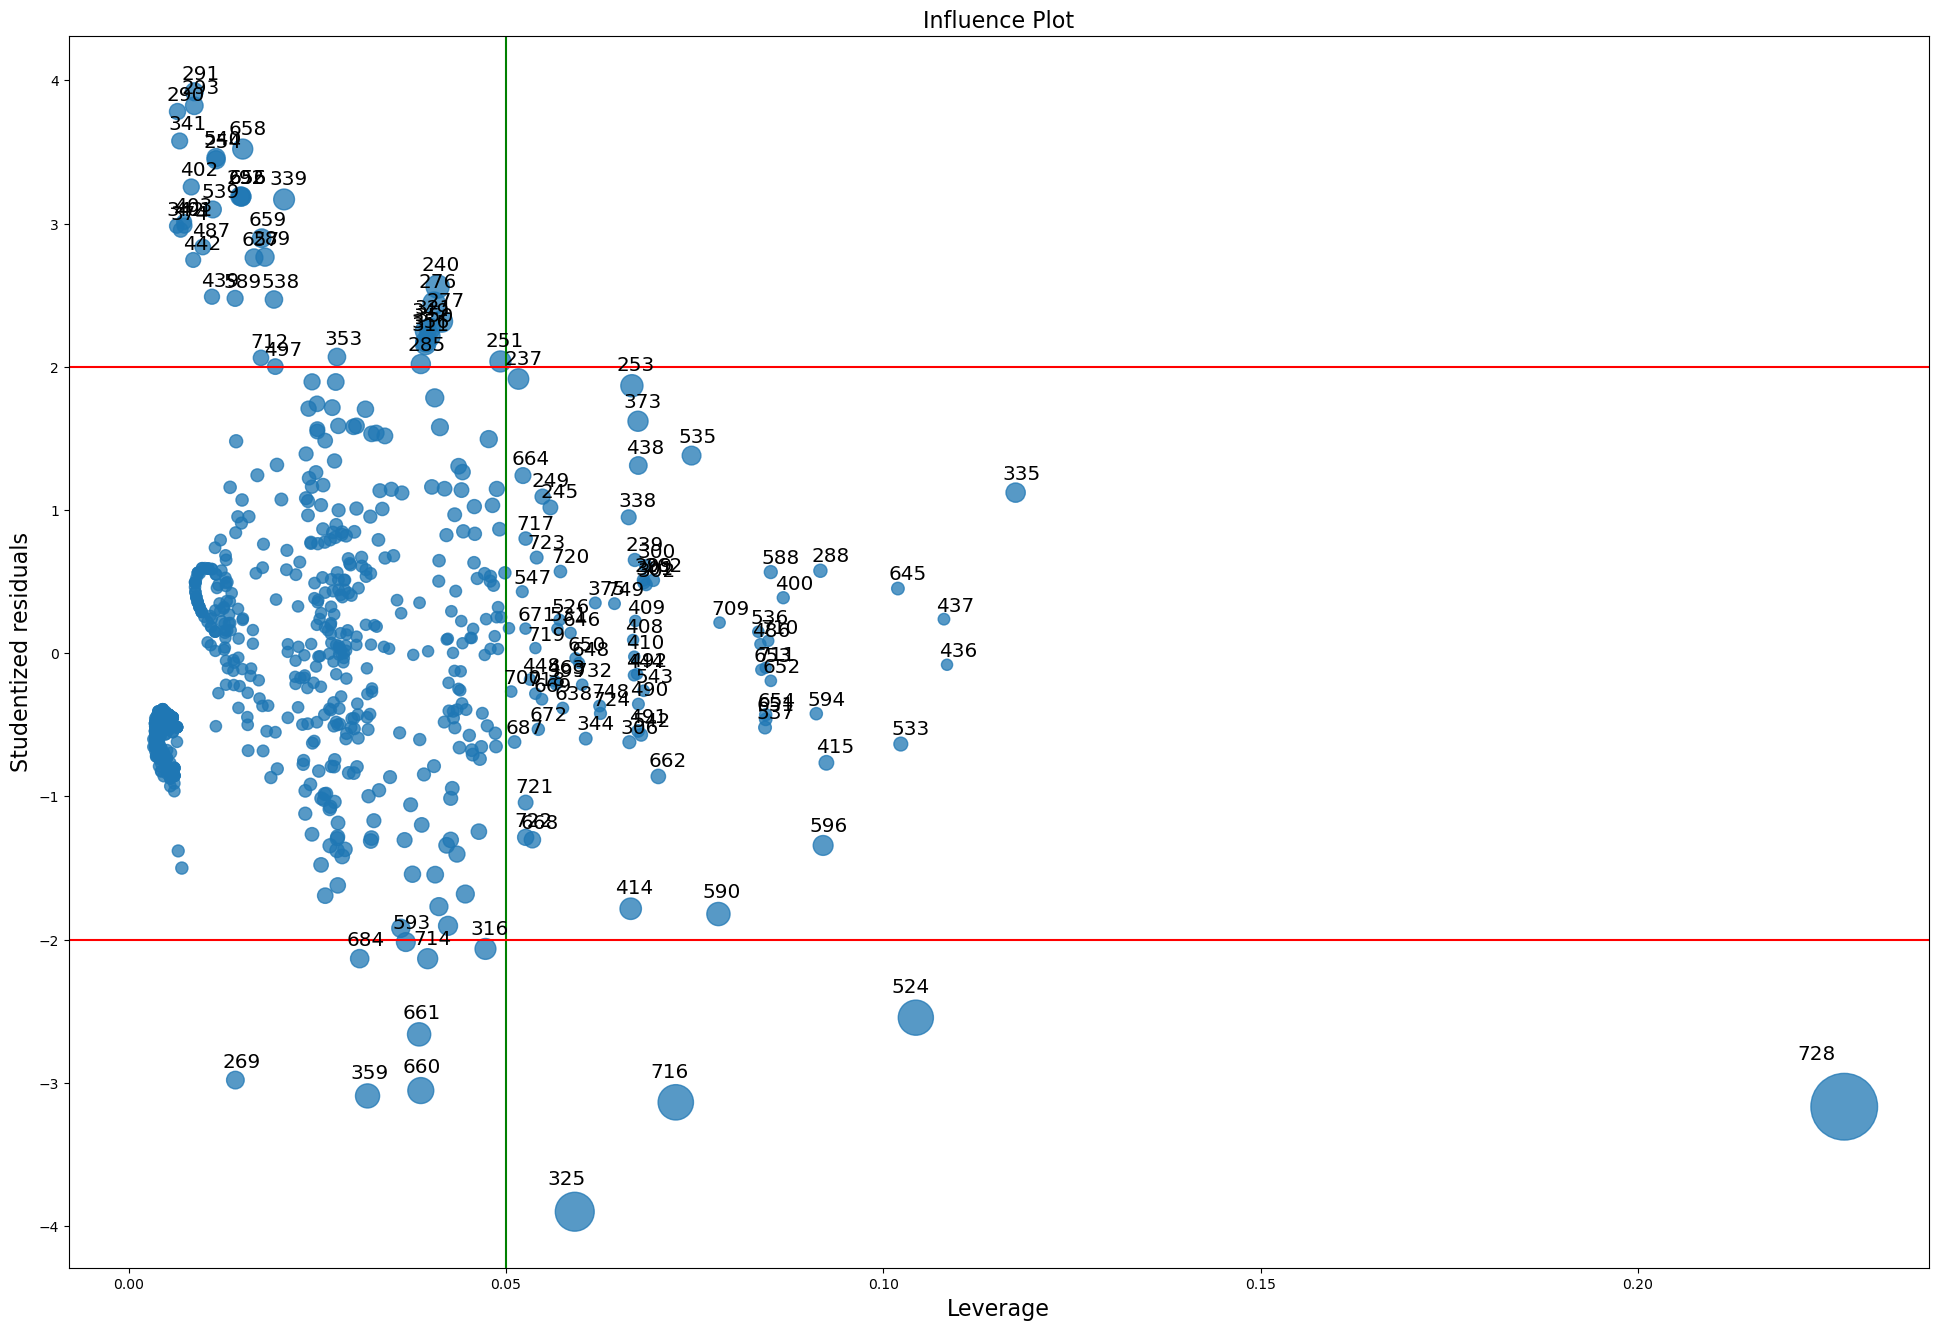

In [47]:
plt.rc('figure', figsize = (24,16))

sm.graphics.influence_plot(f2, criterion = 'Cooks')

axvline(x = round(h_lev, 2), color = 'g')
axhline(y=2, color = 'r')
axhline(y=-2, color = 'r')
xlabel('Leverage')
ylabel('Studentized residuals')

show() #Observations 728, then 325, 524, 716 seem unusual. it's worth taking a look at them.

In [48]:
with pd.option_context('display.max_rows', 5000, 'display.max_columns', 20): 
    display(df.iloc[728].map(int)) #ok
    #display(df.iloc[325].map(int)) #ok
    #display(df.iloc[524].map(int)) #ok
    #display(df.iloc[716].map(int)) #ok

SalePrice_USD                         353982
YearBuilt                               1993
MonthSold                                 12
Size_sqf                                2337
Floor                                     21
N_Manager                                  8
N_Elevators                               20
N_Hospitals_Nearby                         2
N_Malls_Nearby                             1
N_Parks_Nearby                             0
N_FacilitiesInApt                          4
N_Schools_Nearby                          17
N_ParkingLot                            1059
TimeToBusStop_5_10                         0
TimeToBusStop_10_15                        0
TimeToSubway_5_10                          0
TimeToSubway_10_15                         0
TimeToSubway_15_20                         1
TimeToSubway_no_nearby                     0
lnSalePrice_USD                           12
lnYearBuilt                                7
lnMonthSold                                2
lnSize_sqf

# NO OR LITTLE MULTICOLLINEARITY

In [49]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [50]:
f2.params

Intercept                        -161076.298121
C(TimeToBusStop_5_10)[T.1]        -14703.028653
C(TimeToBusStop_10_15)[T.1]        76643.868924
C(TimeToSubway_5_10)[T.1]          36555.893379
C(TimeToSubway_10_15)[T.1]         14207.554528
C(TimeToSubway_15_20)[T.1]        -20001.740978
C(TimeToSubway_no_nearby)[T.1]    127354.998787
MonthSold                           4059.818723
Size_sqf                             445.081290
Size_sqf2                             -0.099623
Floor                                967.476886
N_Manager                          15678.402790
N_Elevators                         1070.472234
N_Hospitals_Nearby                -49544.880139
N_Malls_Nearby                    109070.227247
N_Parks_Nearby                    -62008.734002
N_FacilitiesInApt                  11255.548574
N_Schools_Nearby                   -3987.919456
N_ParkingLot                         -80.898828
dtype: float64

In [51]:
var = ['TimeToBusStop_5_10', 'TimeToBusStop_10_15', 'TimeToSubway_5_10', 'TimeToSubway_10_15', 'TimeToSubway_15_20','TimeToSubway_no_nearby','MonthSold','Size_sqf','Size_sqf2','Floor','N_Manager','N_Elevators','N_Hospitals_Nearby','N_Malls_Nearby','N_Parks_Nearby','N_FacilitiesInApt','N_Schools_Nearby','N_ParkingLot']

In [52]:
get_vif(exogs = var, data = df ) #Variables: Size_sqf, Size_sqf2, N_Malls_Nearby, N_FacilitiesInApt,N_ParkingLot are responsible for multicollinearity. In theory, such a variable should be thrown out of the model.

,VIF,Tolerance
TimeToBusStop_5_10,4.022878,0.248578
TimeToBusStop_10_15,4.202805,0.237936
TimeToSubway_5_10,3.369247,0.296802
TimeToSubway_10_15,4.137528,0.241690
TimeToSubway_15_20,3.283452,0.304557
TimeToSubway_no_nearby,2.588882,0.386267
MonthSold,1.785397,0.560099
Size_sqf,30.005200,0.033328
Size_sqf2,25.709482,0.038896
Floor,1.162709,0.860060


In [53]:
Stargazer([f2,f5])